In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data_ids = test_data['id']

In [31]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [32]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [34]:
train_data=train_data.dropna()

In [35]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
train_data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [37]:
train_data.shape

(165034, 14)

In [38]:
surname_counts = train_data['Surname'].value_counts()

print(surname_counts)

Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64


In [39]:
duplicated_surnames = surname_counts[surname_counts > 1]

print("Duplicated Surnames and Counts:")
print(duplicated_surnames)

Duplicated Surnames and Counts:
Surname
Hsia       2456
T'ien      2282
Hs?        1611
Kao        1577
Maclean    1577
           ... 
Batt          2
Moen          2
Stokes        2
Panina        2
Bazile        2
Name: count, Length: 2571, dtype: int64


In [40]:
correlation_with_exited = train_data[['Surname', 'Exited']].groupby('Surname').mean()
print("Correlation with 'Exited':")
print(correlation_with_exited)


Correlation with 'Exited':
            Exited
Surname           
Abazu     0.000000
Abbie     0.250000
Abbott    0.125000
Abdullah  0.000000
Abdulov   0.250000
...            ...
Zubarev   0.142857
Zubareva  0.000000
Zuev      0.157895
Zuyev     0.224138
Zuyeva    0.166667

[2797 rows x 1 columns]


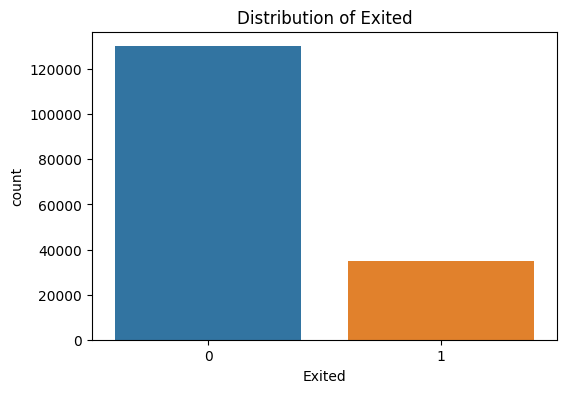

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=train_data)
plt.title('Distribution of Exited')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

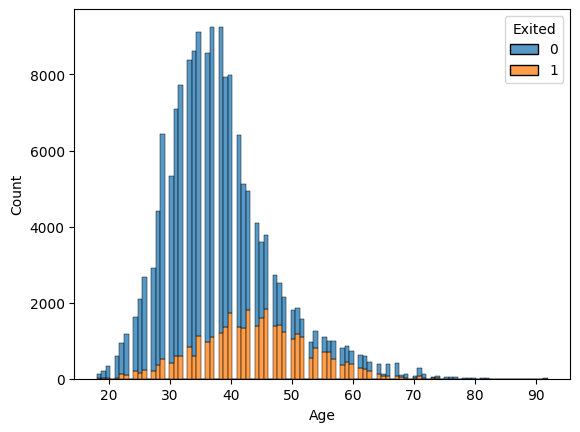

In [42]:
sns.histplot(x='Age',hue='Exited',multiple="stack", bins=100,data=train_data)

<Axes: xlabel='NumOfProducts', ylabel='count'>

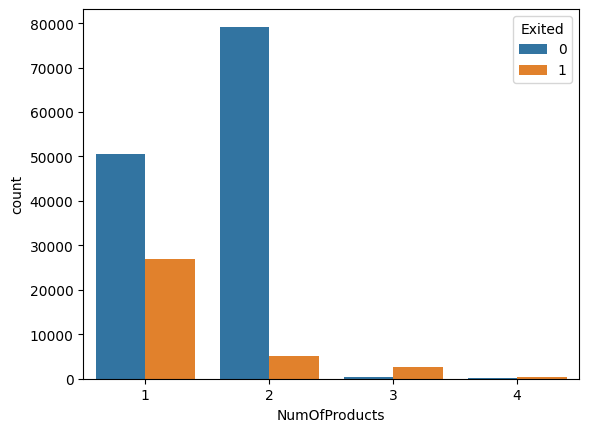

In [43]:
sns.countplot(x='NumOfProducts',hue='Exited',data=train_data)

<Axes: xlabel='IsActiveMember', ylabel='count'>

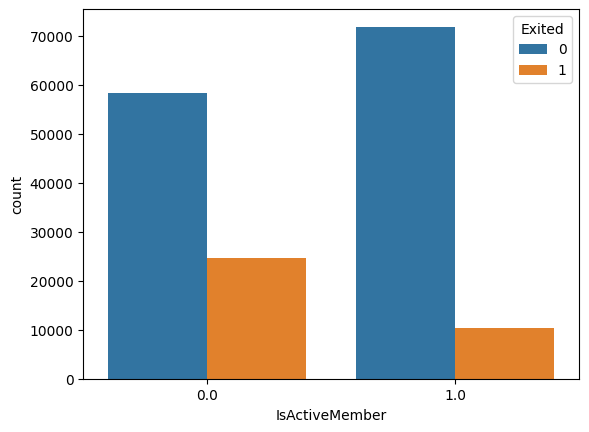

In [44]:
sns.countplot(x='IsActiveMember',hue='Exited',data=train_data)

<Axes: xlabel='Gender', ylabel='count'>

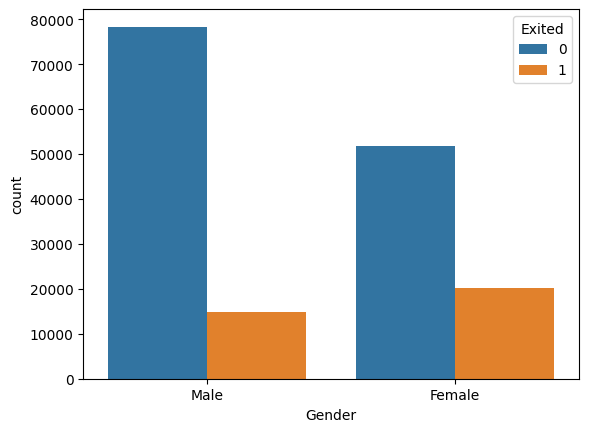

In [45]:
sns.countplot(x='Gender',hue='Exited',data=train_data)

In [46]:
gender_mapping = {'Female': 0, 'Male': 1}
train_data['Gender'] = train_data['Gender'].map(gender_mapping)
train_data = pd.get_dummies(train_data, columns=['Geography'])

test_data['Gender'] = test_data['Gender'].map(gender_mapping)
test_data = pd.get_dummies(test_data, columns = ['Geography'])

In [47]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0,15674932,Okwudilichukwu,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False
1,1,15749177,Okwudiliolisa,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False
2,2,15694510,Hsueh,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False
3,3,15741417,Kao,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False
4,4,15766172,Chiemenam,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True


In [48]:
columns_to_drop = ['Surname','id','CustomerId',]

train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace=True)

In [49]:
train_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,False,False,True
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,True,False,False
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,True,False,False
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,False,False,True


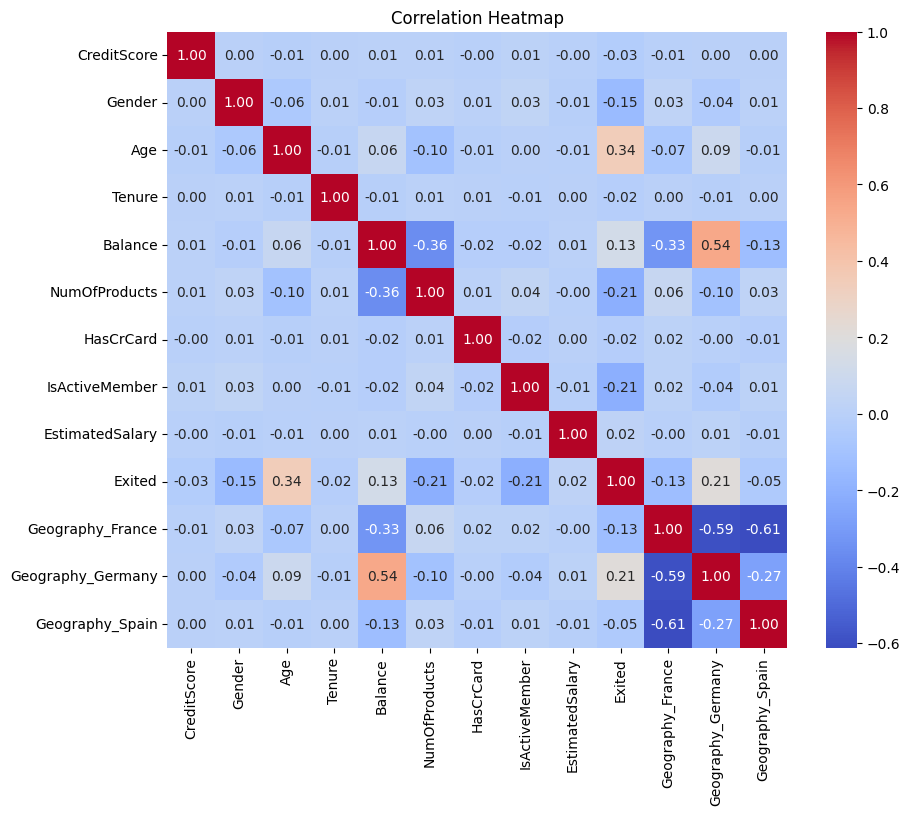

In [50]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
train_data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[['CreditScore']] = scaler.fit_transform(train_data[['CreditScore']])
train_data[['Age']] = scaler.fit_transform(train_data[['Age']])
train_data[['Tenure']] = scaler.fit_transform(train_data[['Tenure']])
train_data[['Balance']] = scaler.fit_transform(train_data[['Balance']])
train_data[['NumOfProducts']] = scaler.fit_transform(train_data[['NumOfProducts']])
train_data[['EstimatedSalary']] = scaler.fit_transform(train_data[['EstimatedSalary']])
train_data.head()

test_data[['CreditScore']] = scaler.fit_transform(test_data[['CreditScore']])
test_data[['Age']] = scaler.fit_transform(test_data[['Age']])
test_data[['Tenure']] = scaler.fit_transform(test_data[['Tenure']])
test_data[['Balance']] = scaler.fit_transform(test_data[['Balance']])
test_data[['NumOfProducts']] = scaler.fit_transform(test_data[['NumOfProducts']])
test_data[['EstimatedSalary']] = scaler.fit_transform(test_data[['EstimatedSalary']])


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X = train_data.drop('Exited',axis=1)
y = train_data['Exited']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8354288484260914
ROC AUC: 0.8180484245246167
Confusion Matrix:
[[24874  1178]
 [ 4254  2701]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     26052
           1       0.70      0.39      0.50      6955

    accuracy                           0.84     33007
   macro avg       0.78      0.67      0.70     33007
weighted avg       0.82      0.84      0.82     33007



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


X = train_data.drop('Exited',axis=1)
y = train_data['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest ROC AUC: {roc_auc_rf}")


conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)


Random Forest Accuracy: 0.8578483352016238
Random Forest ROC AUC: 0.8740806861640321
Random Forest Confusion Matrix:
[[24569  1483]
 [ 3209  3746]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26052
           1       0.72      0.54      0.61      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007



In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with Best Model: {accuracy_best}")



KeyboardInterrupt



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


X = train_data.drop('Exited',axis=1)
y = train_data['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(random_state=42)


xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost ROC AUC: {roc_auc_xgb}")


conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("\nXGBoost Classification Report:")
print(class_report_xgb)


In [28]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = train_data.drop(['Exited'], axis=1)
y = train_data['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_data_lgb = lgb.Dataset(X_train, label=y_train)
test_data_lgb = lgb.Dataset(X_test, label=y_test, reference=train_data_lgb)


params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 36,
    'learning_rate': 0.07,
    'feature_fraction': 0.9
}


num_round = 200
bst = lgb.train(params, train_data_lgb, num_round, valid_sets=[test_data_lgb])


model_file_path = 'path_to_save_model.txt'
bst.save_model(model_file_path)


y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]


accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


conf_matrix = confusion_matrix(y_test, y_pred_binary)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("\nConfusion Matrix:")
print(conf_matrix_df)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
Accuracy: 0.8677856212318599

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.57      0.65      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 

In [56]:
# Predict probabilities
test_predictions = bst.predict(test_data, num_iteration=bst.best_iteration)

# Create a DataFrame with 'id' and 'Exited' columns
submission_df = pd.DataFrame({'id': test_data_ids, 'Exited': test_predictions})
submission_df['Exited'] = submission_df['Exited'].round(1)

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission DataFrame
print(submission_df.head())

       id  Exited
0  165034     0.0
1  165035     0.8
2  165036     0.0
3  165037     0.2
4  165038     0.3
